# Front Matter
URL: https://github.com/alvarobartt/trendet
Integrated with [investpy](https://github.com/alvarobartt/investpy)

In [3]:
import sys
!{sys.executable} -m pip install investpy==0.9.14 trendet==0.7

In [5]:
import investpy
import trendet
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
search_results = investpy.search(text='alibaba')
for i in search_results:
    print(i)

{"id_": 941155, "name": "Alibaba Group Holdings Ltd ADR", "symbol": "BABA", "country": "united states", "tag": "alibaba", "pair_type": "equities", "exchange": "NYSE"}
{"id_": 1117240, "name": "COMMERZBANK AG Call ALIBABA GROUP HOLDING LTD 31Dec99", "symbol": "DE000CV614W4", "country": "france", "tag": "commerzbank-call-alibaba-group", "pair_type": "certificate", "exchange": "Paris"}
{"id_": 1119523, "name": "BNP PARIBAS ARBITRAGE ISSUANCE BV Call 128.27 USD ALIBABA GROUP HOLDING LTD 31Dec99", "symbol": "NL0013280829", "country": "netherlands", "tag": "bnp-call-12827-usd-alibaba-group", "pair_type": "certificate", "exchange": "Amsterdam"}
{"id_": 1119533, "name": "BNP PARIBAS ARBITRAGE ISSUANCE BV Call 132.9 USD ALIBABA GROUP HOLDING LTD 31Dec99", "symbol": "NL0013283369", "country": "netherlands", "tag": "bnp-call-1329-usd-alibaba-group", "pair_type": "certificate", "exchange": "Amsterdam"}
{"id_": 1119538, "name": "BNP PARIBAS ARBITRAGE ISSUANCE BV Call 136.1 USD ALIBABA GROUP HOLDING

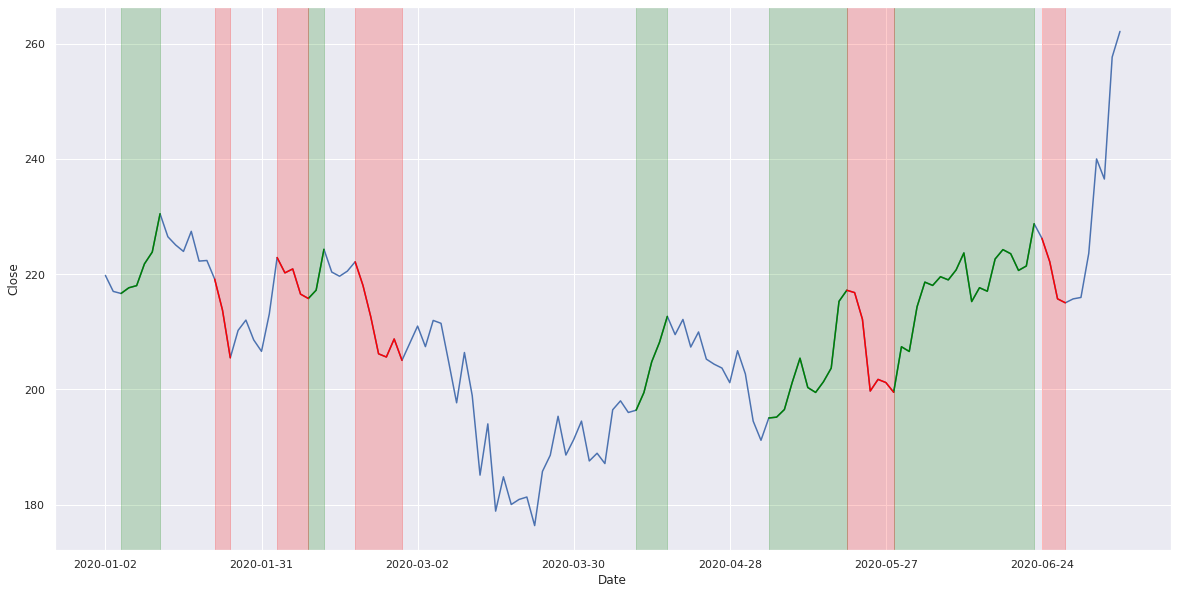

In [20]:
sns.set(style='darkgrid')

df = trendet.identify_all_trends(stock='baba',
                                 country='united states',
                                 from_date='01/01/2020',
                                 to_date='09/07/2020',
                                 window_size=5,
                                 identify='both')

df.reset_index(inplace=True)

plt.figure(figsize=(20, 10))

ax = sns.lineplot(x=df.index, y=df['Close'])
ax.set(xlabel='Date')

labels = df['Up Trend'].dropna().unique().tolist()

for label in labels:
    sns.lineplot(x=df[df['Up Trend'] == label].index,
                 y=df[df['Up Trend'] == label]['Close'],
                 color='green')

    ax.axvspan(df[df['Up Trend'] == label].index[0],
               df[df['Up Trend'] == label].index[-1],
               alpha=0.2,
               color='green')

labels = df['Down Trend'].dropna().unique().tolist()

for label in labels:
    sns.lineplot(x=df[df['Down Trend'] == label].index,
                 y=df[df['Down Trend'] == label]['Close'],
                 color='red')

    ax.axvspan(df[df['Down Trend'] == label].index[0],
               df[df['Down Trend'] == label].index[-1],
               alpha=0.2,
               color='red')
               
locs, _ = plt.xticks()
labels = []

for position in locs[1:-1]:
    labels.append(str(df['Date'].loc[position])[:-9])

plt.xticks(locs[1:-1], labels)
plt.show()